In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from utils import *
from sklearn.model_selection import train_test_split



c:\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train = list()
test = list()
for dataset in os.listdir('data'):
    x_train,x_test,_,_ = get_data(dataset, '\t')
    train.append(x_train.shape[0])
    test.append(x_test.shape[1])
    
    
  

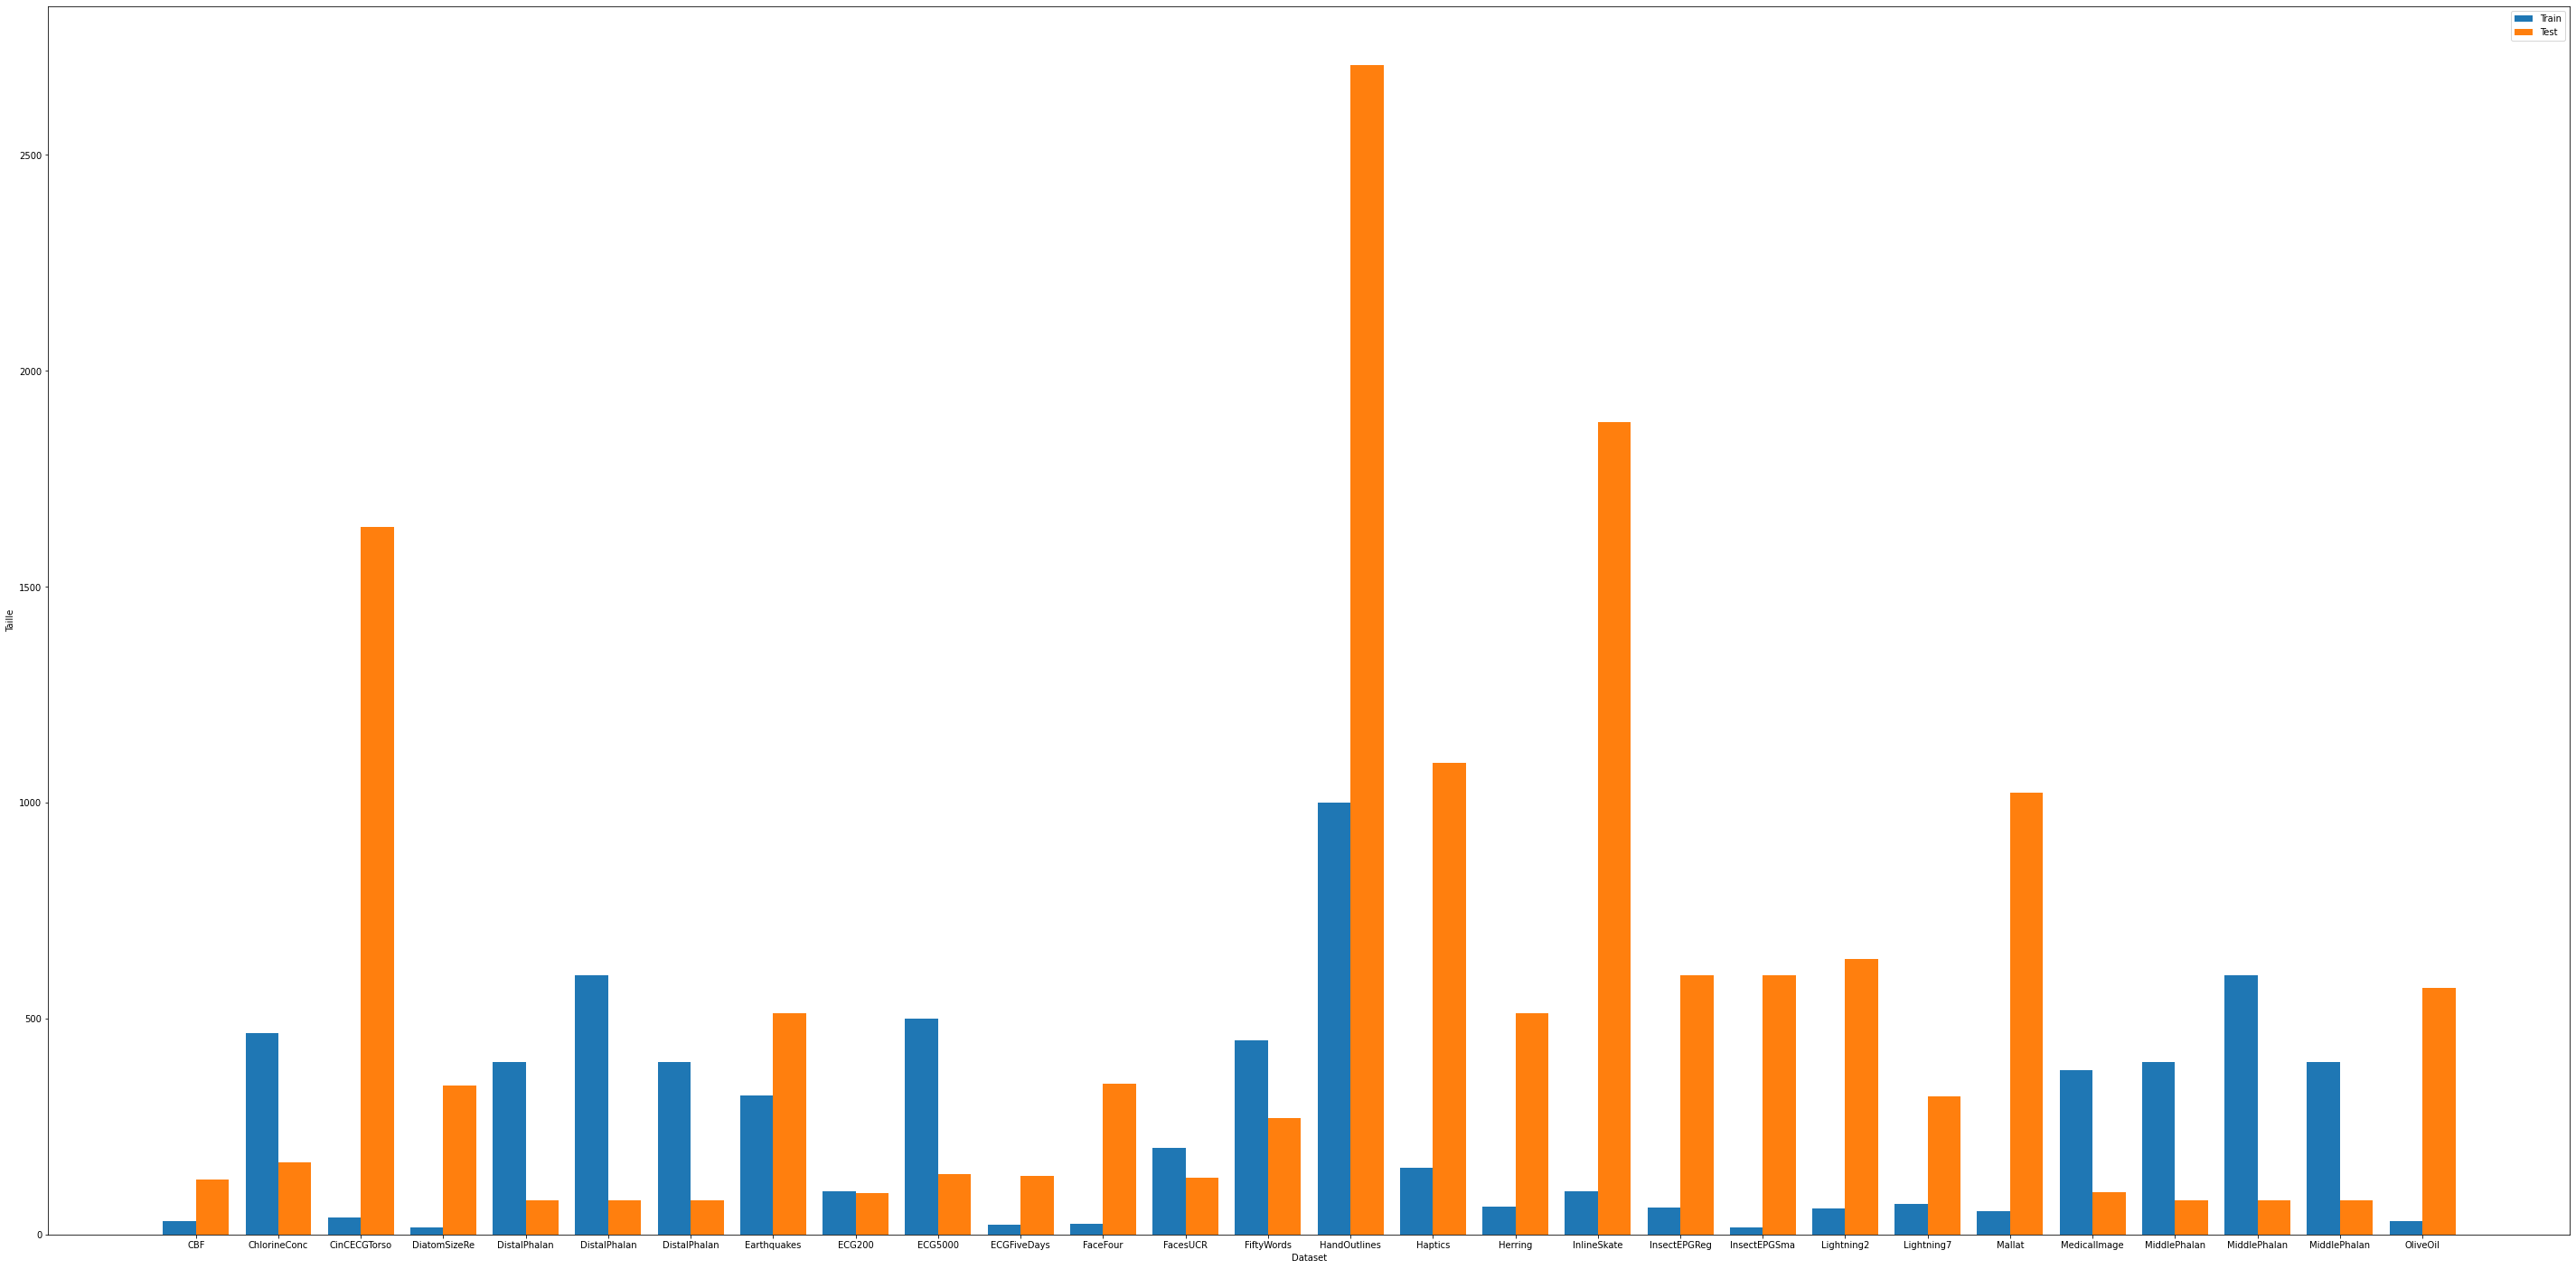

In [3]:
datasets = os.listdir('data')
datasets = [elt[:12] for elt in datasets]

plt.figure(figsize=(50,25))
X_axis = np.arange(len(datasets))
  
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test')
plt.xticks(X_axis, datasets)
plt.xlabel("Dataset")
plt.ylabel("Taille")
plt.legend()

In [4]:
dataset = 'DiatomSizeReduction'


In [5]:
x_train,x_test,y_train,y_test = get_data(dataset, '\t')

y_train = class_offset(y_train, dataset)
y_test = class_offset(y_test, dataset)
y_train

array([1., 2., 3., 2., 2., 1., 3., 2., 3., 0., 1., 2., 1., 3., 1., 1.])

In [6]:


x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size=0.5)

print('train shape', x_train.shape)
print('validation shape', x_val.shape)
print('test shape', x_test.shape)



train shape (16, 345)
validation shape (153, 345)
test shape (153, 345)


In [7]:
def donut_visu(ax, data,name):
  recipe = [f'{round(data[i]/data.sum(),1)*100} % - Class {i}' for i in range(len(data))]


  wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

  ax.set_title(name)


In [8]:
_, rat_train = np.unique(y_train, return_counts=True)
print(rat_train)
_, rat_val = np.unique(y_val, return_counts=True)
print(rat_val)
_, rat_test = np.unique(y_test, return_counts=True)
print(rat_test)

[1 6 5 4]
[14 53 45 41]
[19 39 49 46]


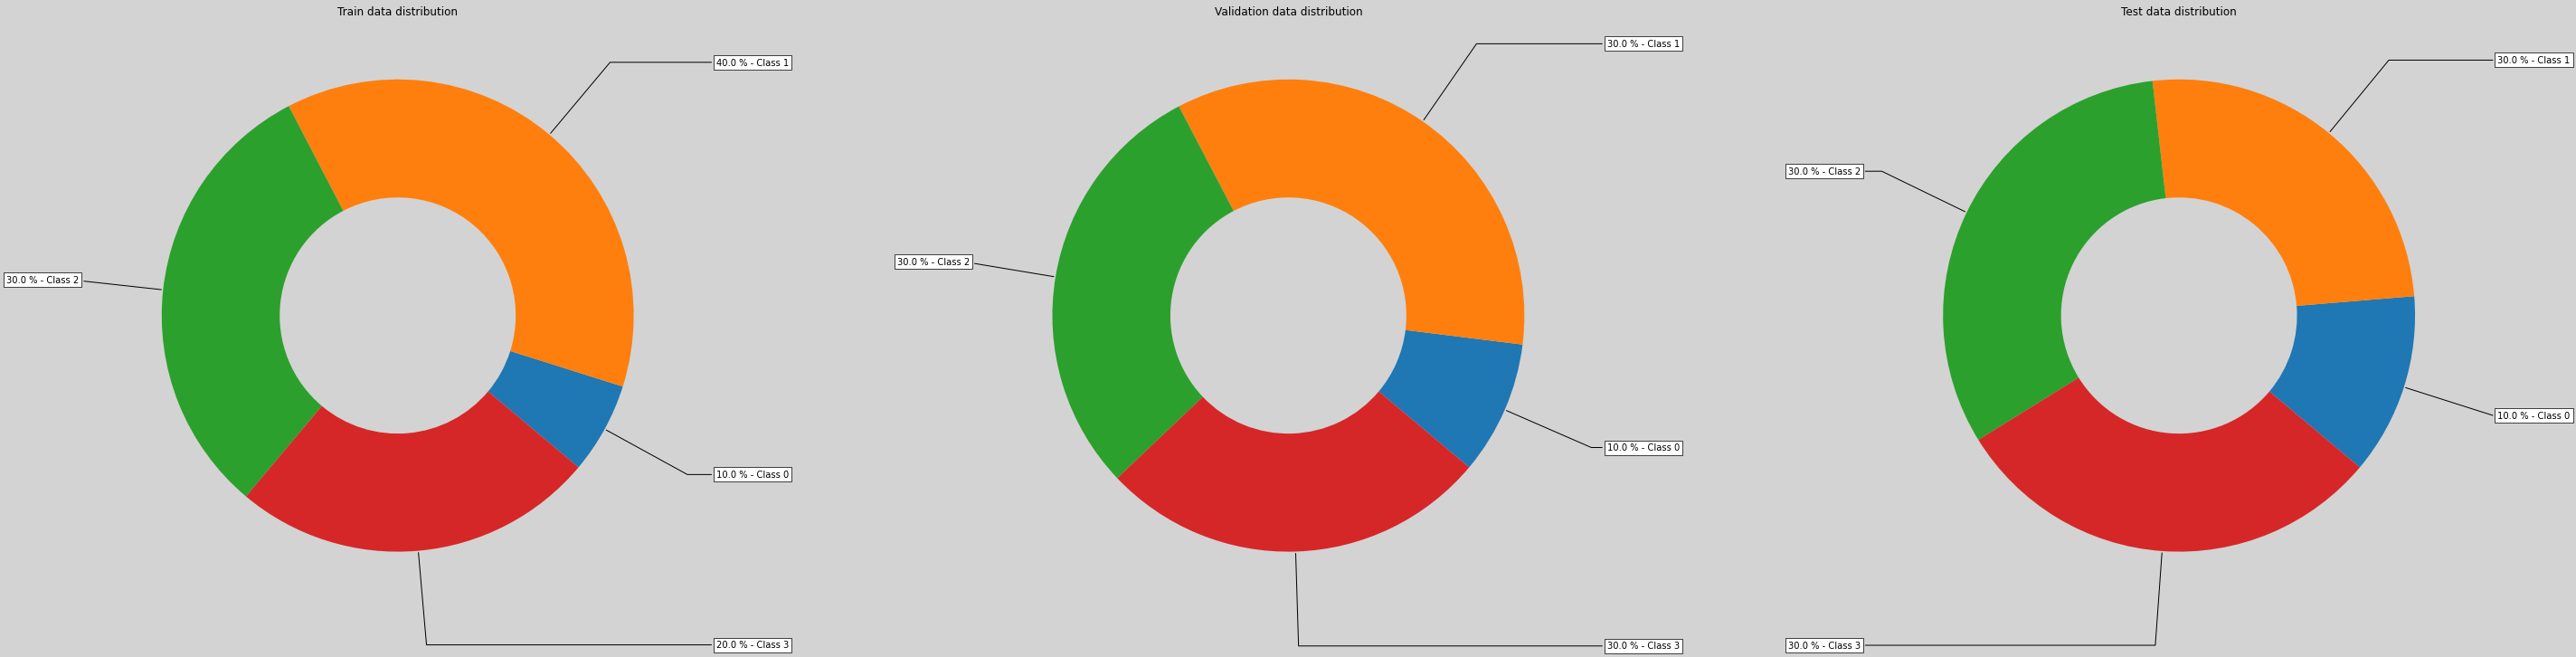

In [9]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(50, 12))

fig.set_facecolor('lightgrey')

donut_visu(ax0,rat_train,'Train data distribution')
donut_visu(ax1,rat_val,'Validation data distribution')
donut_visu(ax2,rat_test,'Test data distribution')

plt.show()

# Losses visualisation

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from trendfilter import trend_filter

## Merging Loss csv

In [20]:
df1 = pd.read_csv('Results/1-8/Losses/loss.csv')
df2 = pd.read_csv('Results/9-17/Losses/loss.csv')

df = pd.merge(df1,df2, on='Step')

## Plot Losses

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


IndexError: index 5 is out of bounds for axis 0 with size 5

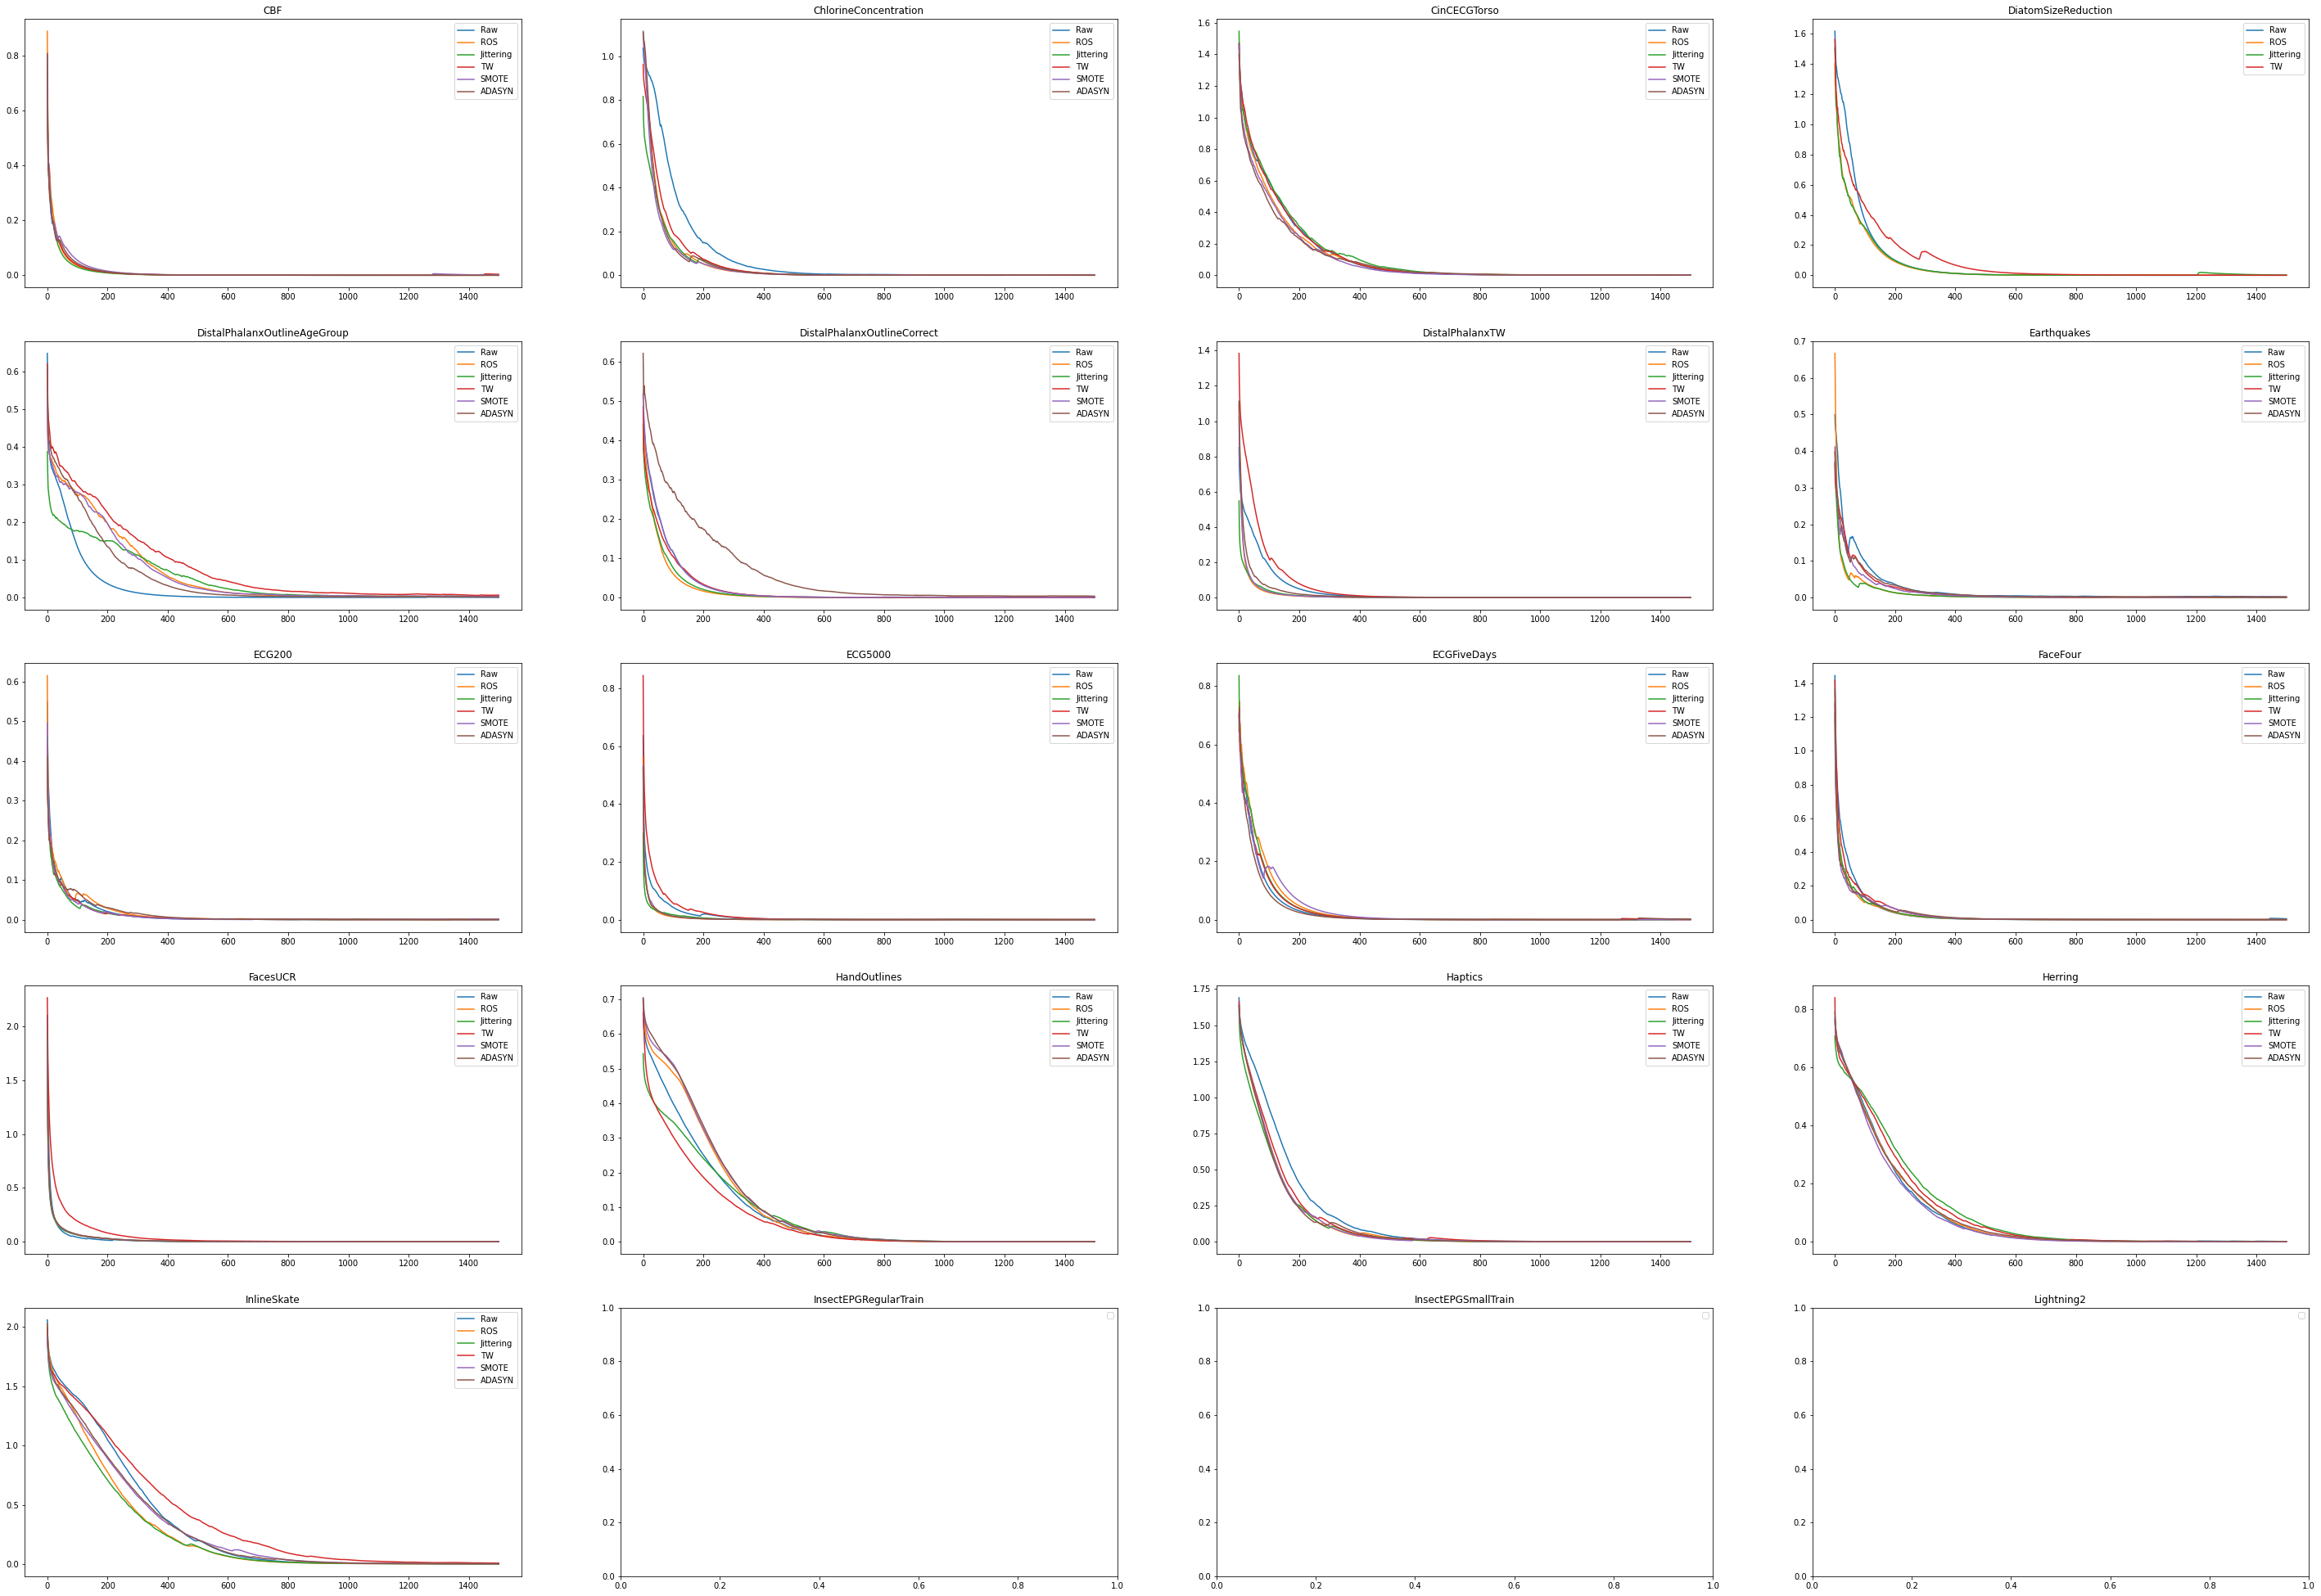

In [23]:
%matplotlib inline
dataset = os.listdir('data')
Da = ['Raw', 'ROS', 'Jittering', 'TW', 'SMOTE', 'ADASYN']
fig, ax = plt.subplots(5,4,figsize=(50, 35))

for i in range(len(dataset)):
  for j in range(len( Da)):
    
    try:
      loss = df[f'Classification{dataset[i]}  - {Da[j]} - loss'].ewm(99).mean()
      ax[i//4][i%4].plot(loss, label = Da[j])
    except:
      pass
    
    
  ax[i//4][i%4].set_title(dataset[i])
  ax[i//4][i%4].legend()
    


plt.legend()
plt.show()

## Merging validation losses csv


In [25]:
df1 = pd.read_csv('Results/1-8/Losses/val_loss.csv')
df2 = pd.read_csv('Results/9-17/Losses/val_loss.csv')

df = pd.merge(df1,df2, on='Step')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


IndexError: index 5 is out of bounds for axis 0 with size 5

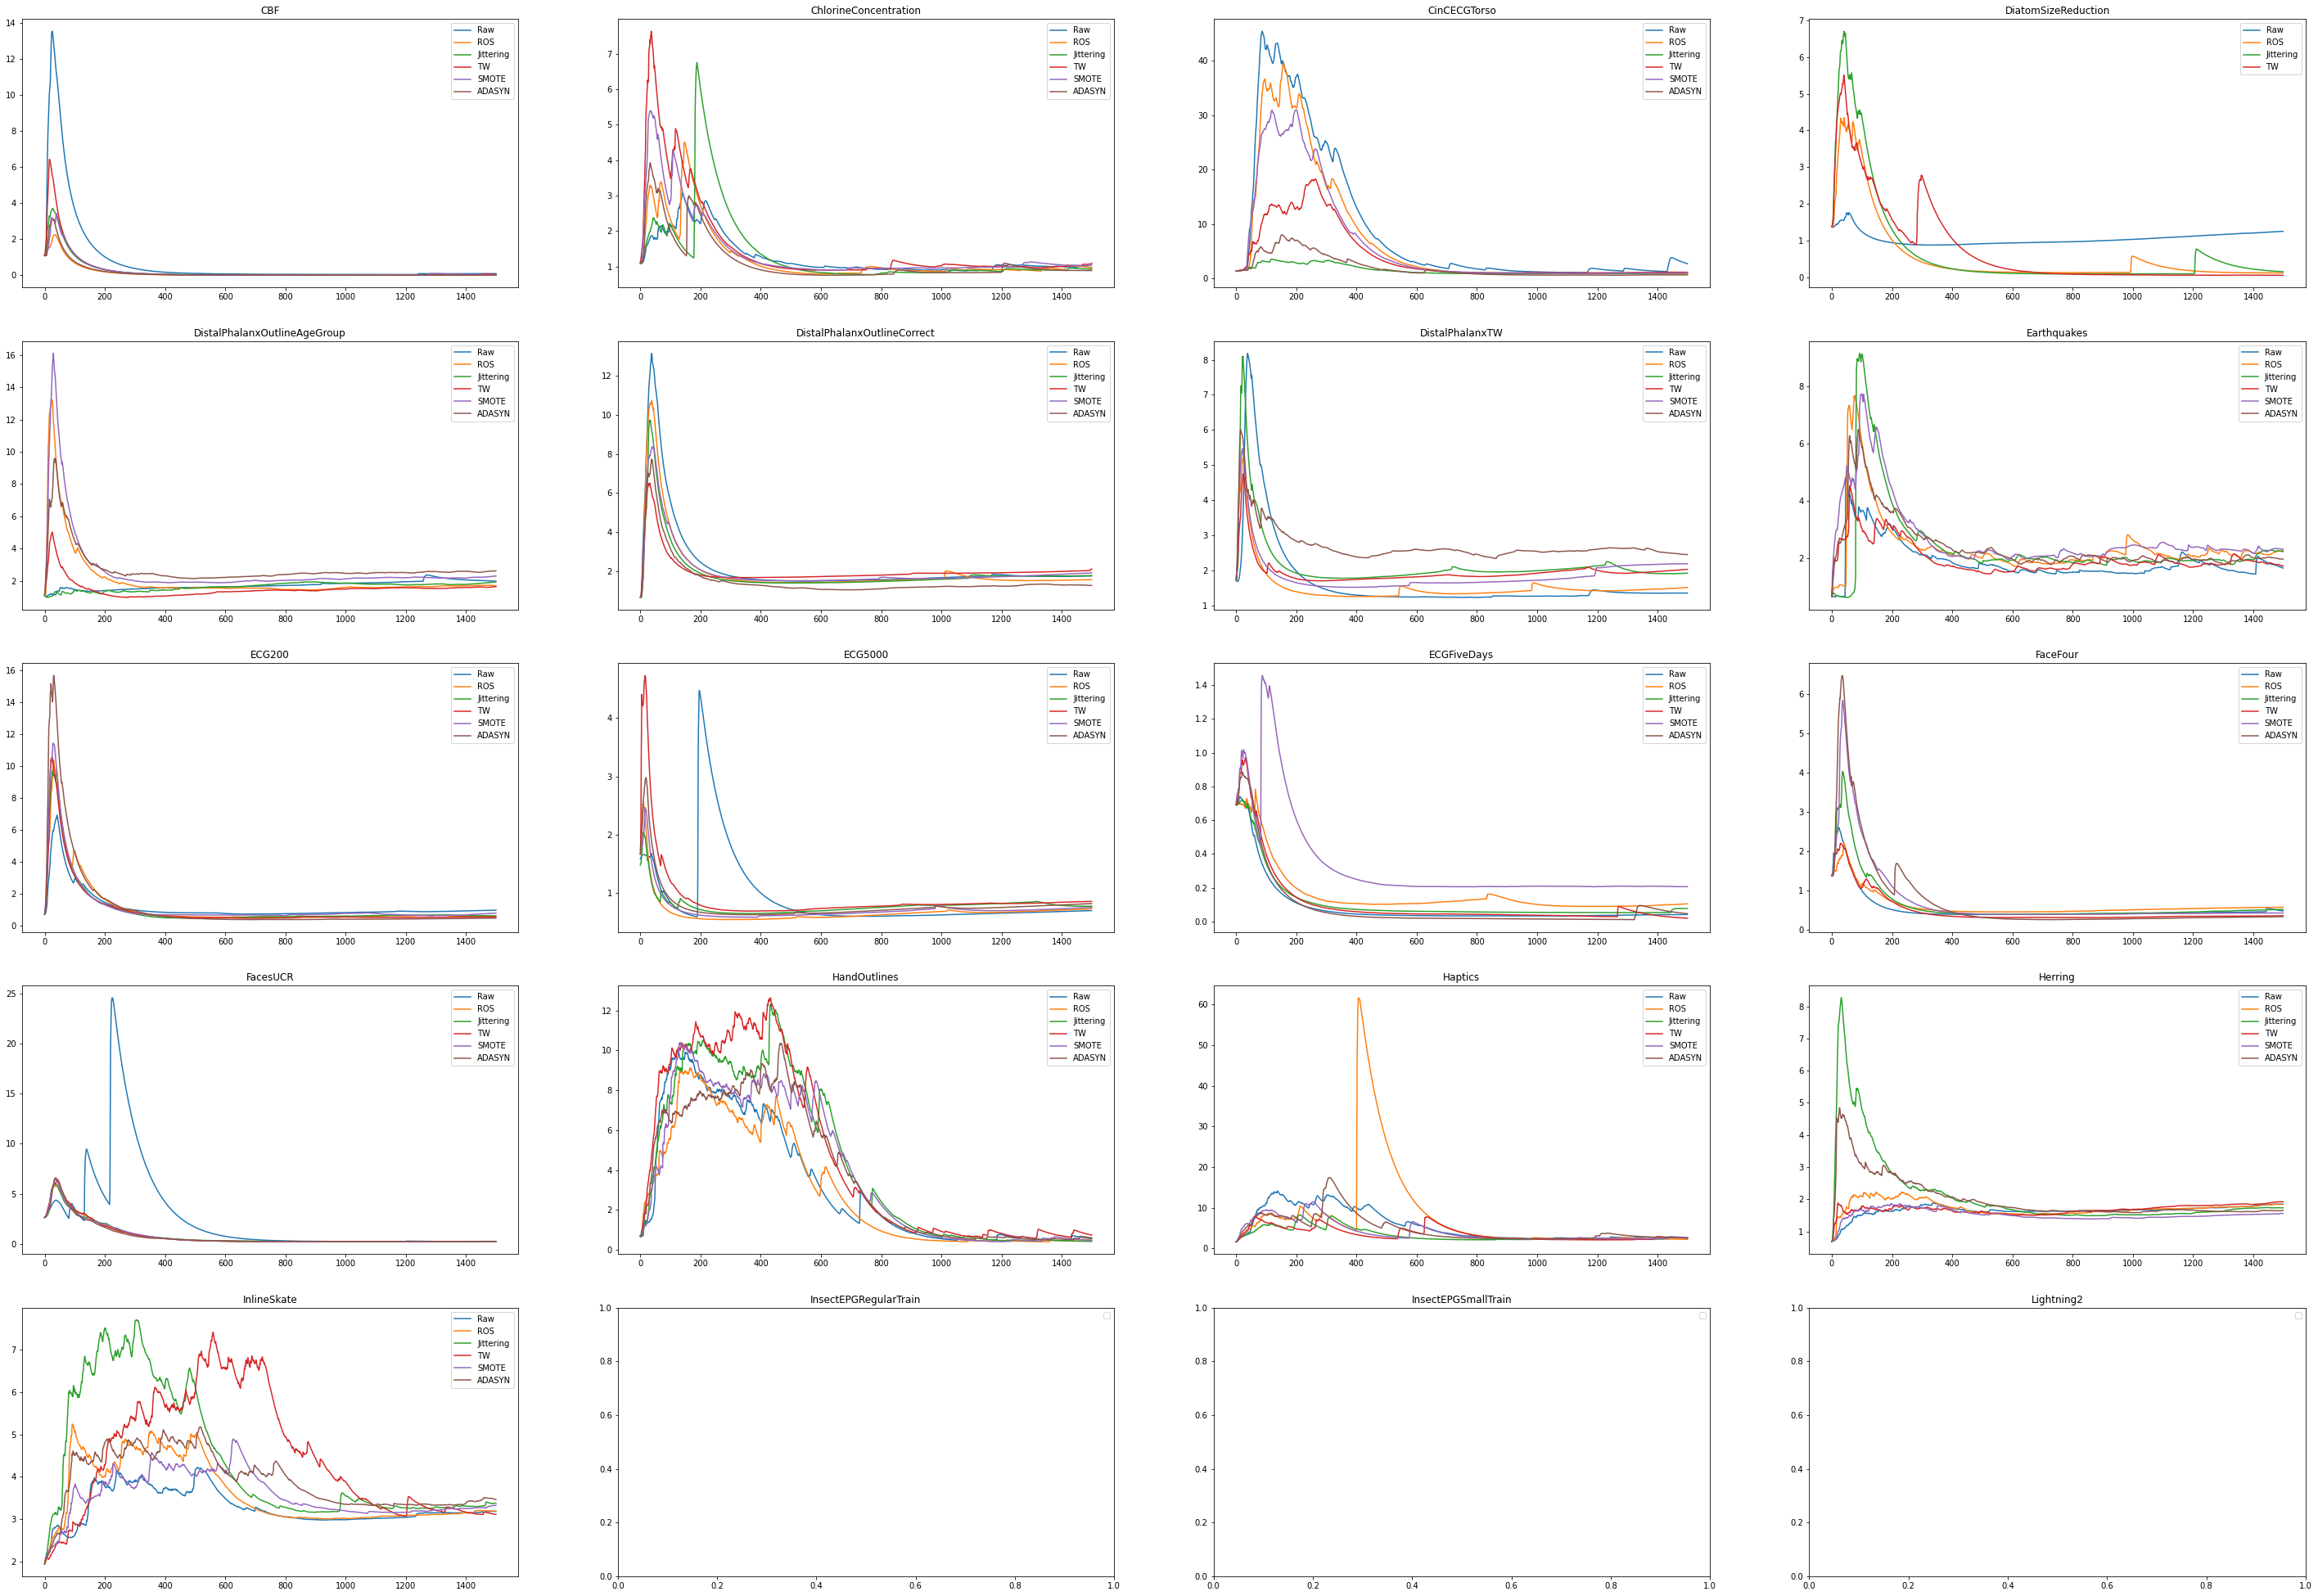

In [27]:
%matplotlib inline
dataset = os.listdir('data')
Da = ['Raw', 'ROS', 'Jittering', 'TW', 'SMOTE', 'ADASYN']
fig, ax = plt.subplots(5,4,figsize=(50, 35))

for i in range(len(dataset)):
  for j in range(len( Da)):
    
    try:
      loss = df[f'Classification{dataset[i]}  - {Da[j]} - val_loss'].ewm(99).mean()
      ax[i//4][i%4].plot(loss, label = Da[j])
    except:
      print('')
    
    
  ax[i//4][i%4].set_title(dataset[i])
  ax[i//4][i%4].legend()
    


plt.legend()
plt.show()

In [1]:
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("djbd/ImbalanceClassification")
summary_list = [] 
config_list = [] 
name_list = [] 
for run in runs: 
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict) 

    # run.config is the input metrics.
    # We remove special values that start with _.
    config = {k:v for k,v in run.config.items() if not k.startswith('_')}
    config_list.append(config) 

    # run.name is the name of the run.
    name_list.append(run.name)       

import pandas as pd 
summary_df = pd.DataFrame.from_records(summary_list) 
config_df = pd.DataFrame.from_records(config_list) 
name_df = pd.DataFrame({'name': name_list}) 
all_df = pd.concat([name_df, config_df,summary_df], axis=1)

all_df.to_csv("project.csv")

c:\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\Python38\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


AttributeError: 'NoneType' object has no attribute 'message_types_by_name'